# Sales Prediction Using Python

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [20]:
df= pd.read_csv('car_purchasing.csv',encoding ='latin-1')

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [22]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [23]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

# No missing data

<Axes: >

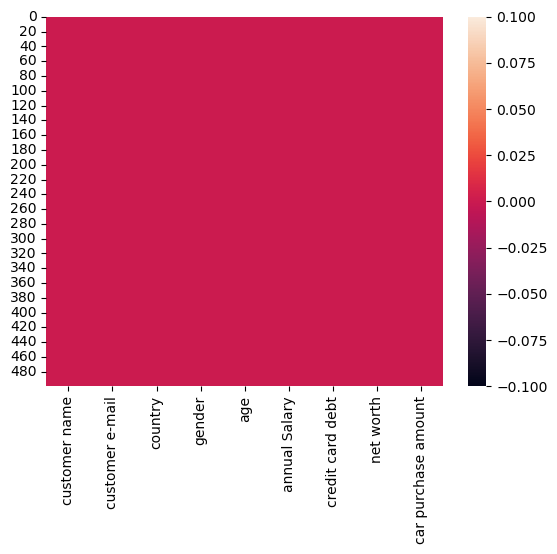

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [26]:
df.describe(include="object").T

,count,unique,top,freq
customer name,500,498,Seth,2
customer e-mail,500,500,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,1
country,500,211,Israel,6


# Dropping the columns which is not used in the prediction

In [27]:
df.drop('customer name',axis=1,inplace=True)


In [28]:
df.drop('customer e-mail',axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [43]:
%matplotlib inline
import plotly.express as px

In [45]:
plt.figure(figsize=(10,10))
px.box(data_frame=df, y="annual Salary")

<Figure size 1000x1000 with 0 Axes>

# Find the limits

In [38]:
upper_limit=df["annual Salary"].mean() + 3*df["annual Salary"].std()
lower_limit=df["annual Salary"].mean() - 3*df["annual Salary"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  97237.37429088239
lower limit:  27017.104924237603


# Find outliers

In [39]:
outliers_df=df.loc[(df["annual Salary"]> upper_limit) |(df["annual Salary"] < lower_limit)]
outliers_df.shape

(2, 7)

# Remove outliers

In [46]:
newdf =df.loc[(df["annual Salary"]< upper_limit) & (df["annual Salary"] > lower_limit)]

print("Outliers: ",len(df)-len(newdf))

Outliers:  2


In [47]:
plt.figure(figsize=(7,5))
px.box(data_frame=newdf, y="annual Salary")

<Figure size 700x500 with 0 Axes>

In [48]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 31.1+ KB


In [49]:
output_file = "salesdata.csv"
newdf.to_csv(output_file,index=False)

In [50]:
new = pd.read_csv("salesdata.csv")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.4+ KB


# Finding sales detais by gender-wise

In [53]:
f= df['gender'].value_counts()
gender_female=f[1]
gender_male=f[0]
print('The number of male are',f[1])
print('The number of female are',f[0])

The number of male are 253
The number of female are 247


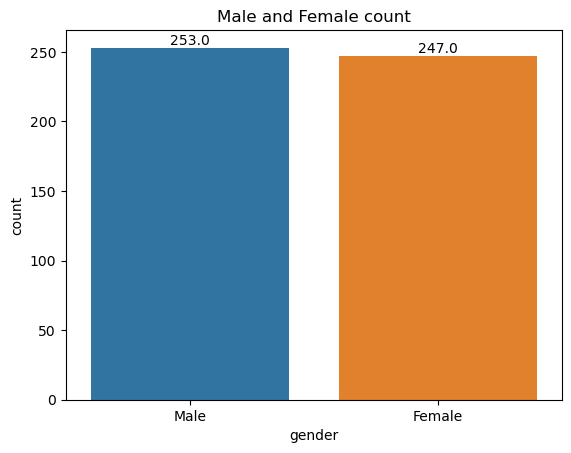

In [54]:
ax = sns.countplot(x='gender',data=df,order=df['gender'].value_counts().index)
plt.title("Male and Female count")
plt.xticks([0,1],['Male','Female'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2.,p.get_height()),ha = 'center',va='bottom')
plt.show()    

In [55]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [56]:
grouped1 = new.groupby(['country','age','gender']).size().unstack()
sum_of_male_female_age = grouped1.sum(axis=1).reset_index(name='Gender_Total')

sum_of_male_female_age

,country,age,Gender_Total
0,Afghanistan,51.084811,1.0
1,Afghanistan,57.134576,1.0
2,Algeria,37.269332,1.0
3,Algeria,42.144445,1.0
4,Algeria,43.152897,1.0
...,...,...,...
493,Zimbabwe,55.989615,1.0
494,marlal,46.731152,1.0
495,Åland Islands,40.083317,1.0
496,Åland Islands,45.341289,1.0


In [57]:
def all_age(series):
    return list(series)
count =0
result_data = []
for i in range(0,len(sum_of_male_female_age)):
    if sum_of_male_female_age['Gender_Total'].iloc[i] >=0:
        count+=1
        country = sum_of_male_female_age['country'].iloc[i]
        age=sum_of_male_female_age['age'].iloc[i]
        gender_total=sum_of_male_female_age['Gender_Total'].iloc[1]
        
        result_data.append([country,age,gender_total])
result_df=pd.DataFrame(result_data,columns=['country','age','Gender_Total'])
result_df_country = result_df.groupby(['country']).agg({'age':all_age,'Gender_Total':'count'})
result_df_country_sorted= result_df_country.sort_values(by='Gender_Total',ascending = False)
print(result_df_country_sorted)
print("Total count",count)

                                                                                            age  \
country                                                                                           
Bolivia                                       [29.59907959, 35.37515645, 45.49732494, 46.245...   
Israel                                        [42.91579507, 43.3868909, 44.31436254, 46.2708...   
Mauritania                                    [38.93027639, 41.17366372, 41.37223373, 41.705...   
Grenada                                       [36.51447117, 40.99660693, 43.50671123, 46.566...   
Equatorial Guinea                             [47.71401166, 48.93654638, 51.22247207, 51.361...   
...                                                                                         ...   
Bonaire, Sint Eustatius and Saba                                                  [48.25655639]   
Kenya                                                                             [50.41432737]   
Kazakhstan

# Highest rank-Mauritania,Israel and Bolivia in purchasing car

In [58]:
output_file = "country_data.csv"
result_df_country_sorted.to_csv(output_file,index=False)

In [59]:
new = pd.read_csv("salesdata.csv")
new.info()
new_country = pd.read_csv('country_data.csv')
new_country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              498 non-null    object 
 1   gender               498 non-null    int64  
 2   age                  498 non-null    float64
 3   annual Salary        498 non-null    float64
 4   credit card debt     498 non-null    float64
 5   net worth            498 non-null    float64
 6   car purchase amount  498 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.4+ KB


,age,Gender_Total
0,"[29.59907959, 35.37515645, 45.49732494, 46.245...",6
1,"[42.91579507, 43.3868909, 44.31436254, 46.2708...",6
2,"[38.93027639, 41.17366372, 41.37223373, 41.705...",6
3,"[36.51447117, 40.99660693, 43.50671123, 46.566...",5
4,"[47.71401166, 48.93654638, 51.22247207, 51.361...",5


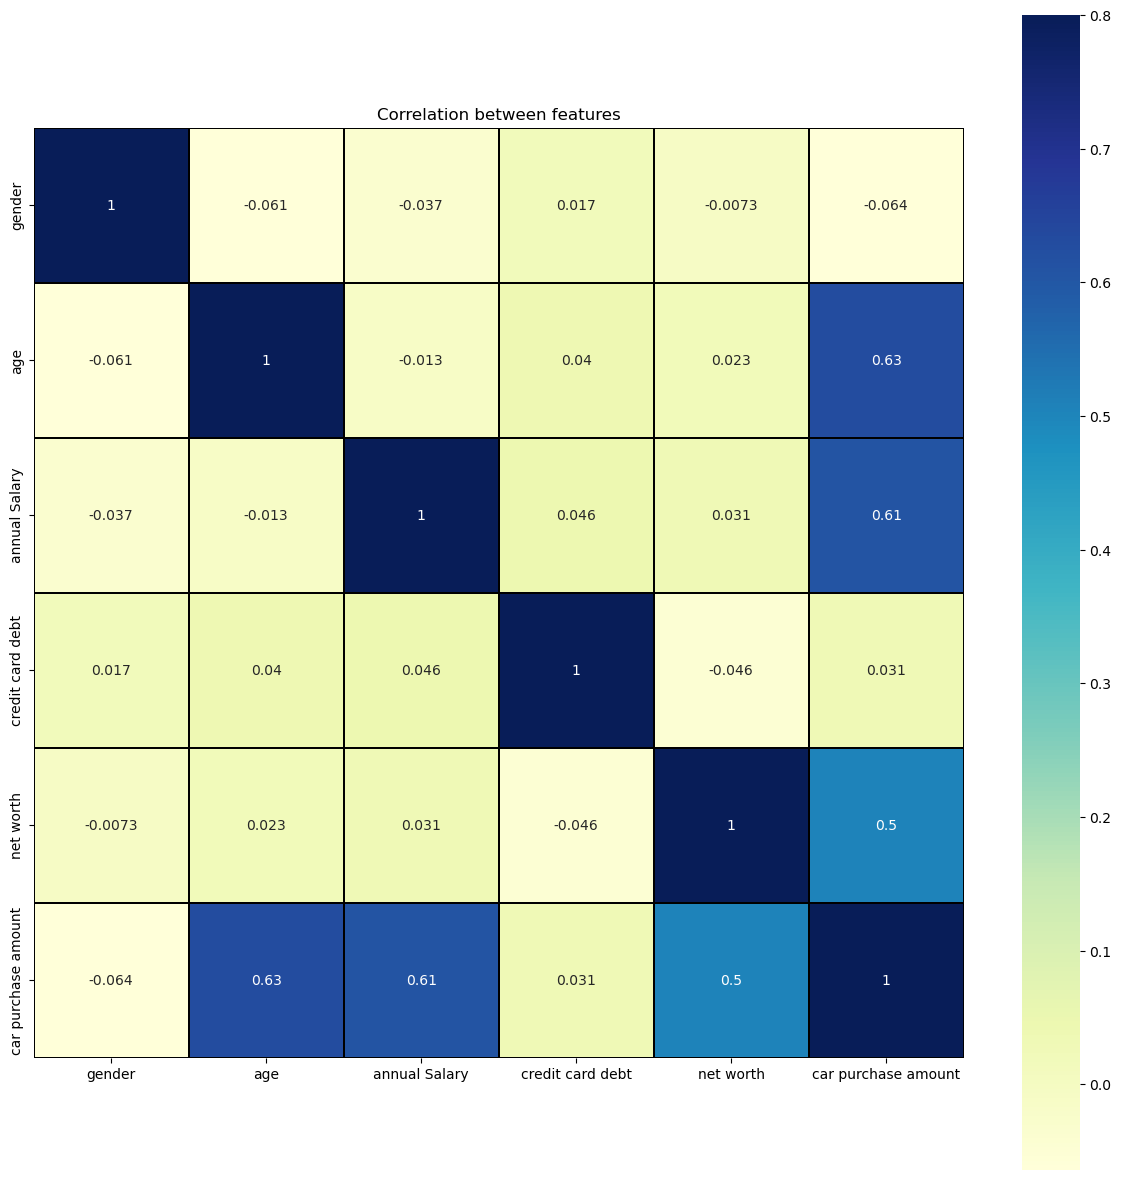

In [60]:
corr= new.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

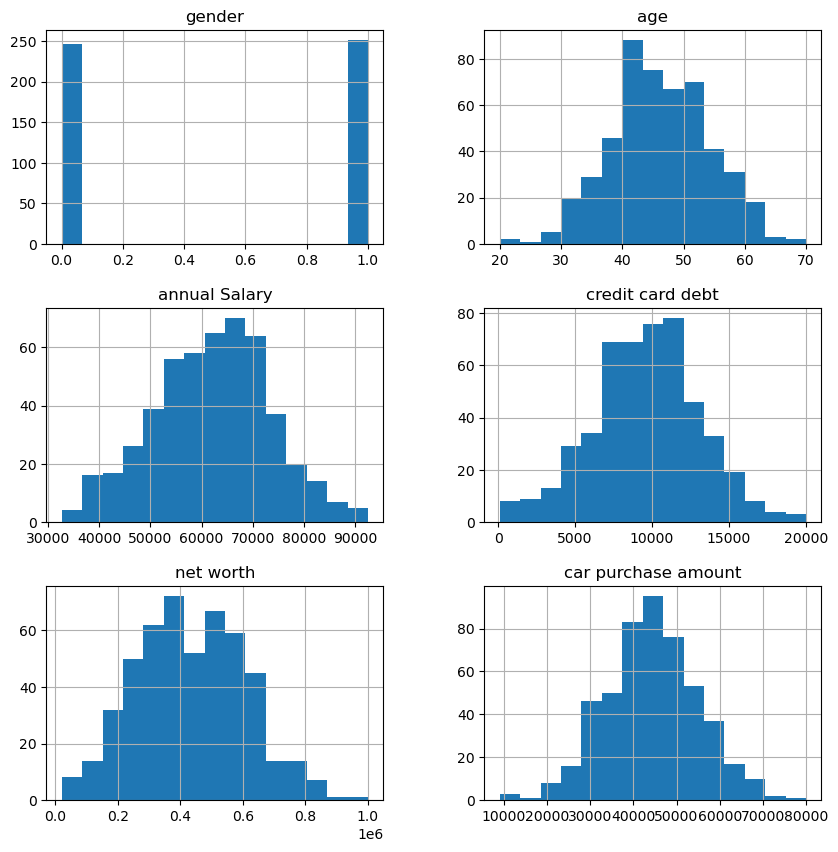

In [62]:
new.hist(figsize=(10,10),bins = 15)

plt.show()

In [64]:
import category_encoders as ce

In [65]:
country_df = pd.DataFrame(new['country'])
country_df

,country
0,Bulgaria
1,Belize
2,Algeria
3,Cook Islands
4,Brazil
...,...
493,Nepal
494,Zimbabwe
495,Philippines
496,Botswana


In [66]:
encoder=ce.BinaryEncoder(cols=['country'])
country_encoded = encoder.fit_transform(country_df)
country_encoded

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
493,0,1,0,1,1,1,1,0
494,0,1,1,1,1,1,0,0
495,1,0,1,0,0,0,0,0
496,0,0,0,1,1,1,1,1


In [67]:
new = new.drop(['country'],axis=1)
result =pd.concat([new,country_encoded],axis=1)
result

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,0,0,0,0,0,0,0,1
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,0,0,0,0,0,0,1,0
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,0,0,0,0,0,0,1,1
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,0,0,0,0,0,1,0,0
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,0,1,0,1,1,1,1,0
494,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,0,1,1,1,1,1,0,0
495,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,1,0,1,0,0,0,0,0
496,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,0,0,0,1,1,1,1,1


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [71]:
X = result.drop(["car purchase amount"], axis=1)
y = result["car purchase amount"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train,y_train)

     gender        age  annual Salary  credit card debt    net worth  \
56        1  43.030881    51419.50777      11331.204470  636407.1148   
227       0  45.095155    63687.49880      13421.368210  358615.9327   
280       0  41.863615    51539.93045       6932.950306  371355.6935   
485       0  43.365470    50051.14039        893.235341  347177.8367   
220       0  47.450949    61063.35631      12066.265710  509543.0859   
..      ...        ...            ...               ...          ...   
106       1  30.349459    61922.89710      10366.503260  323453.2022   
270       1  45.194794    74173.39239      11315.596260  521404.2386   
348       0  42.120080    38453.86033      15283.417520  320834.0102   
435       0  51.525327    48746.71666       3923.407178  217188.4056   
102       0  48.476396    63975.06090      10614.854490  891439.8761   

     country_0  country_1  country_2  country_3  country_4  country_5  \
56           0          0          1          1          1    

# Linear regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [80]:
reg_pred=regression.predict(X_test)

Text(0, 0.5, 'Predicted')

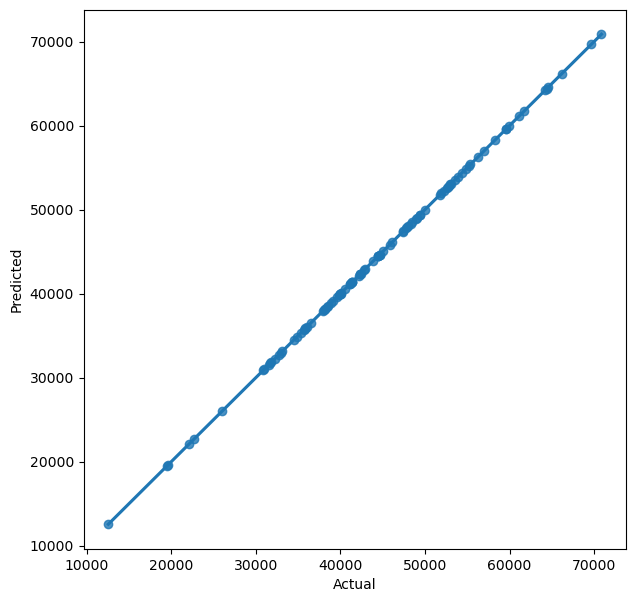

In [81]:
import seaborn as sns
plt.rcParams['figure.figsize'] =[7,7]
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [82]:
from sklearn.metrics import r2_score

In [84]:
score=r2_score(reg_pred,y_test)

In [85]:
print(" Accuracy :",score)
score_linear = score*100

 Accuracy : 0.9999999827355437


In [86]:
from mpl_toolkits.mplot3d import axes3d

In [87]:
coef=regression.coef_
intercept=regression.intercept_
xs=np.arange(0,500,20)
ys=np.arange(0,100,20)
xs,ys=np.meshgrid(xs,ys)

           
           
zs=xs*coef[0]+ys*coef[1]+intercept

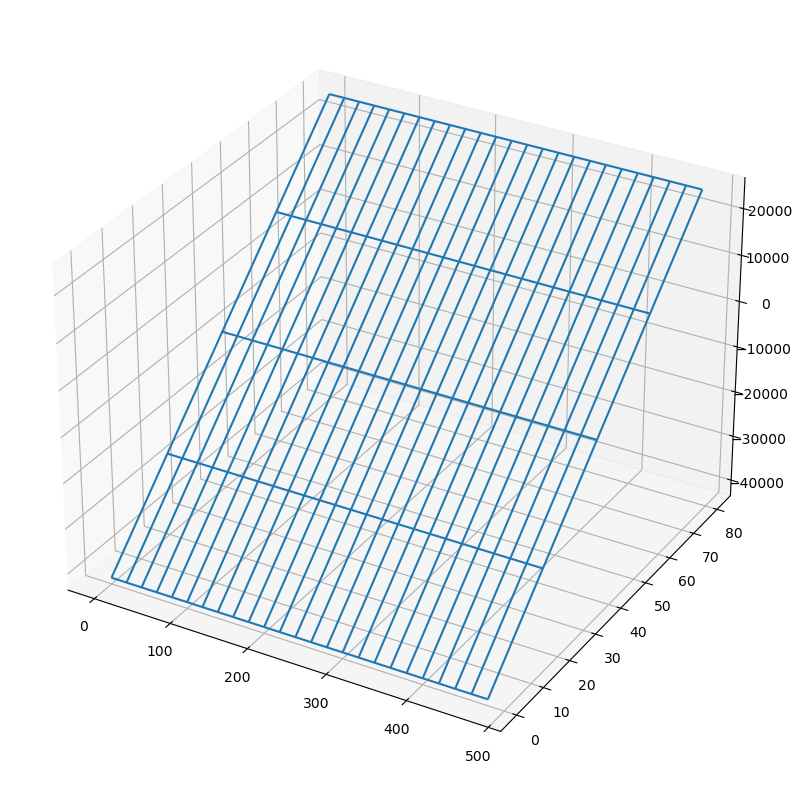

In [89]:
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
ax.plot_wireframe(xs,ys,zs,rstride=1,cstride=1)
    
plt.show()

In [118]:
model=LinearRegression().fit(X,y)
r_sq=model.score(X,y)
print('Accuracy:',r_sq)

Accuracy: 0.9999999812045197


# Polynomial regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
Data=PolynomialFeatures(degree=2, include_bias = True)

In [99]:
Data.fit(X)

PolynomialFeatures()

In [100]:
X_=Data.transform(X)

In [101]:
sample=LinearRegression().fit(X_,y)

In [102]:
r_sq=sample.score(X_,y)

In [103]:
print("Accuracy:",r_sq)
score_poly = r_sq*100

Accuracy: 0.9999999822872584


# Decision Tree Algorithm

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [107]:
regressor = DecisionTreeRegressor(max_depth =3 ,random_state=100,min_samples_leaf=1)
model =regressor.fit(X_train,y_train)

[Text(0.5, 0.875, 'x[2] <= 60931.504\nsquared_error = 111767277.959\nsamples = 398\nvalue = 44230.427'),
 Text(0.25, 0.625, 'x[1] <= 42.584\nsquared_error = 76557207.049\nsamples = 168\nvalue = 37673.41'),
 Text(0.125, 0.375, 'x[4] <= 333731.641\nsquared_error = 48403213.481\nsamples = 57\nvalue = 30286.07'),
 Text(0.0625, 0.125, 'squared_error = 41249360.794\nsamples = 22\nvalue = 25116.513'),
 Text(0.1875, 0.125, 'squared_error = 25542942.322\nsamples = 35\nvalue = 33535.506'),
 Text(0.375, 0.375, 'x[4] <= 491653.188\nsquared_error = 48600162.984\nsamples = 111\nvalue = 41466.909'),
 Text(0.3125, 0.125, 'squared_error = 32277751.93\nsamples = 67\nvalue = 37761.861'),
 Text(0.4375, 0.125, 'squared_error = 20722040.765\nsamples = 44\nvalue = 47108.686'),
 Text(0.75, 0.625, 'x[1] <= 46.24\nsquared_error = 83142229.837\nsamples = 230\nvalue = 49019.9'),
 Text(0.625, 0.375, 'x[4] <= 426888.188\nsquared_error = 46291143.429\nsamples = 116\nvalue = 43585.261'),
 Text(0.5625, 0.125, 'squared

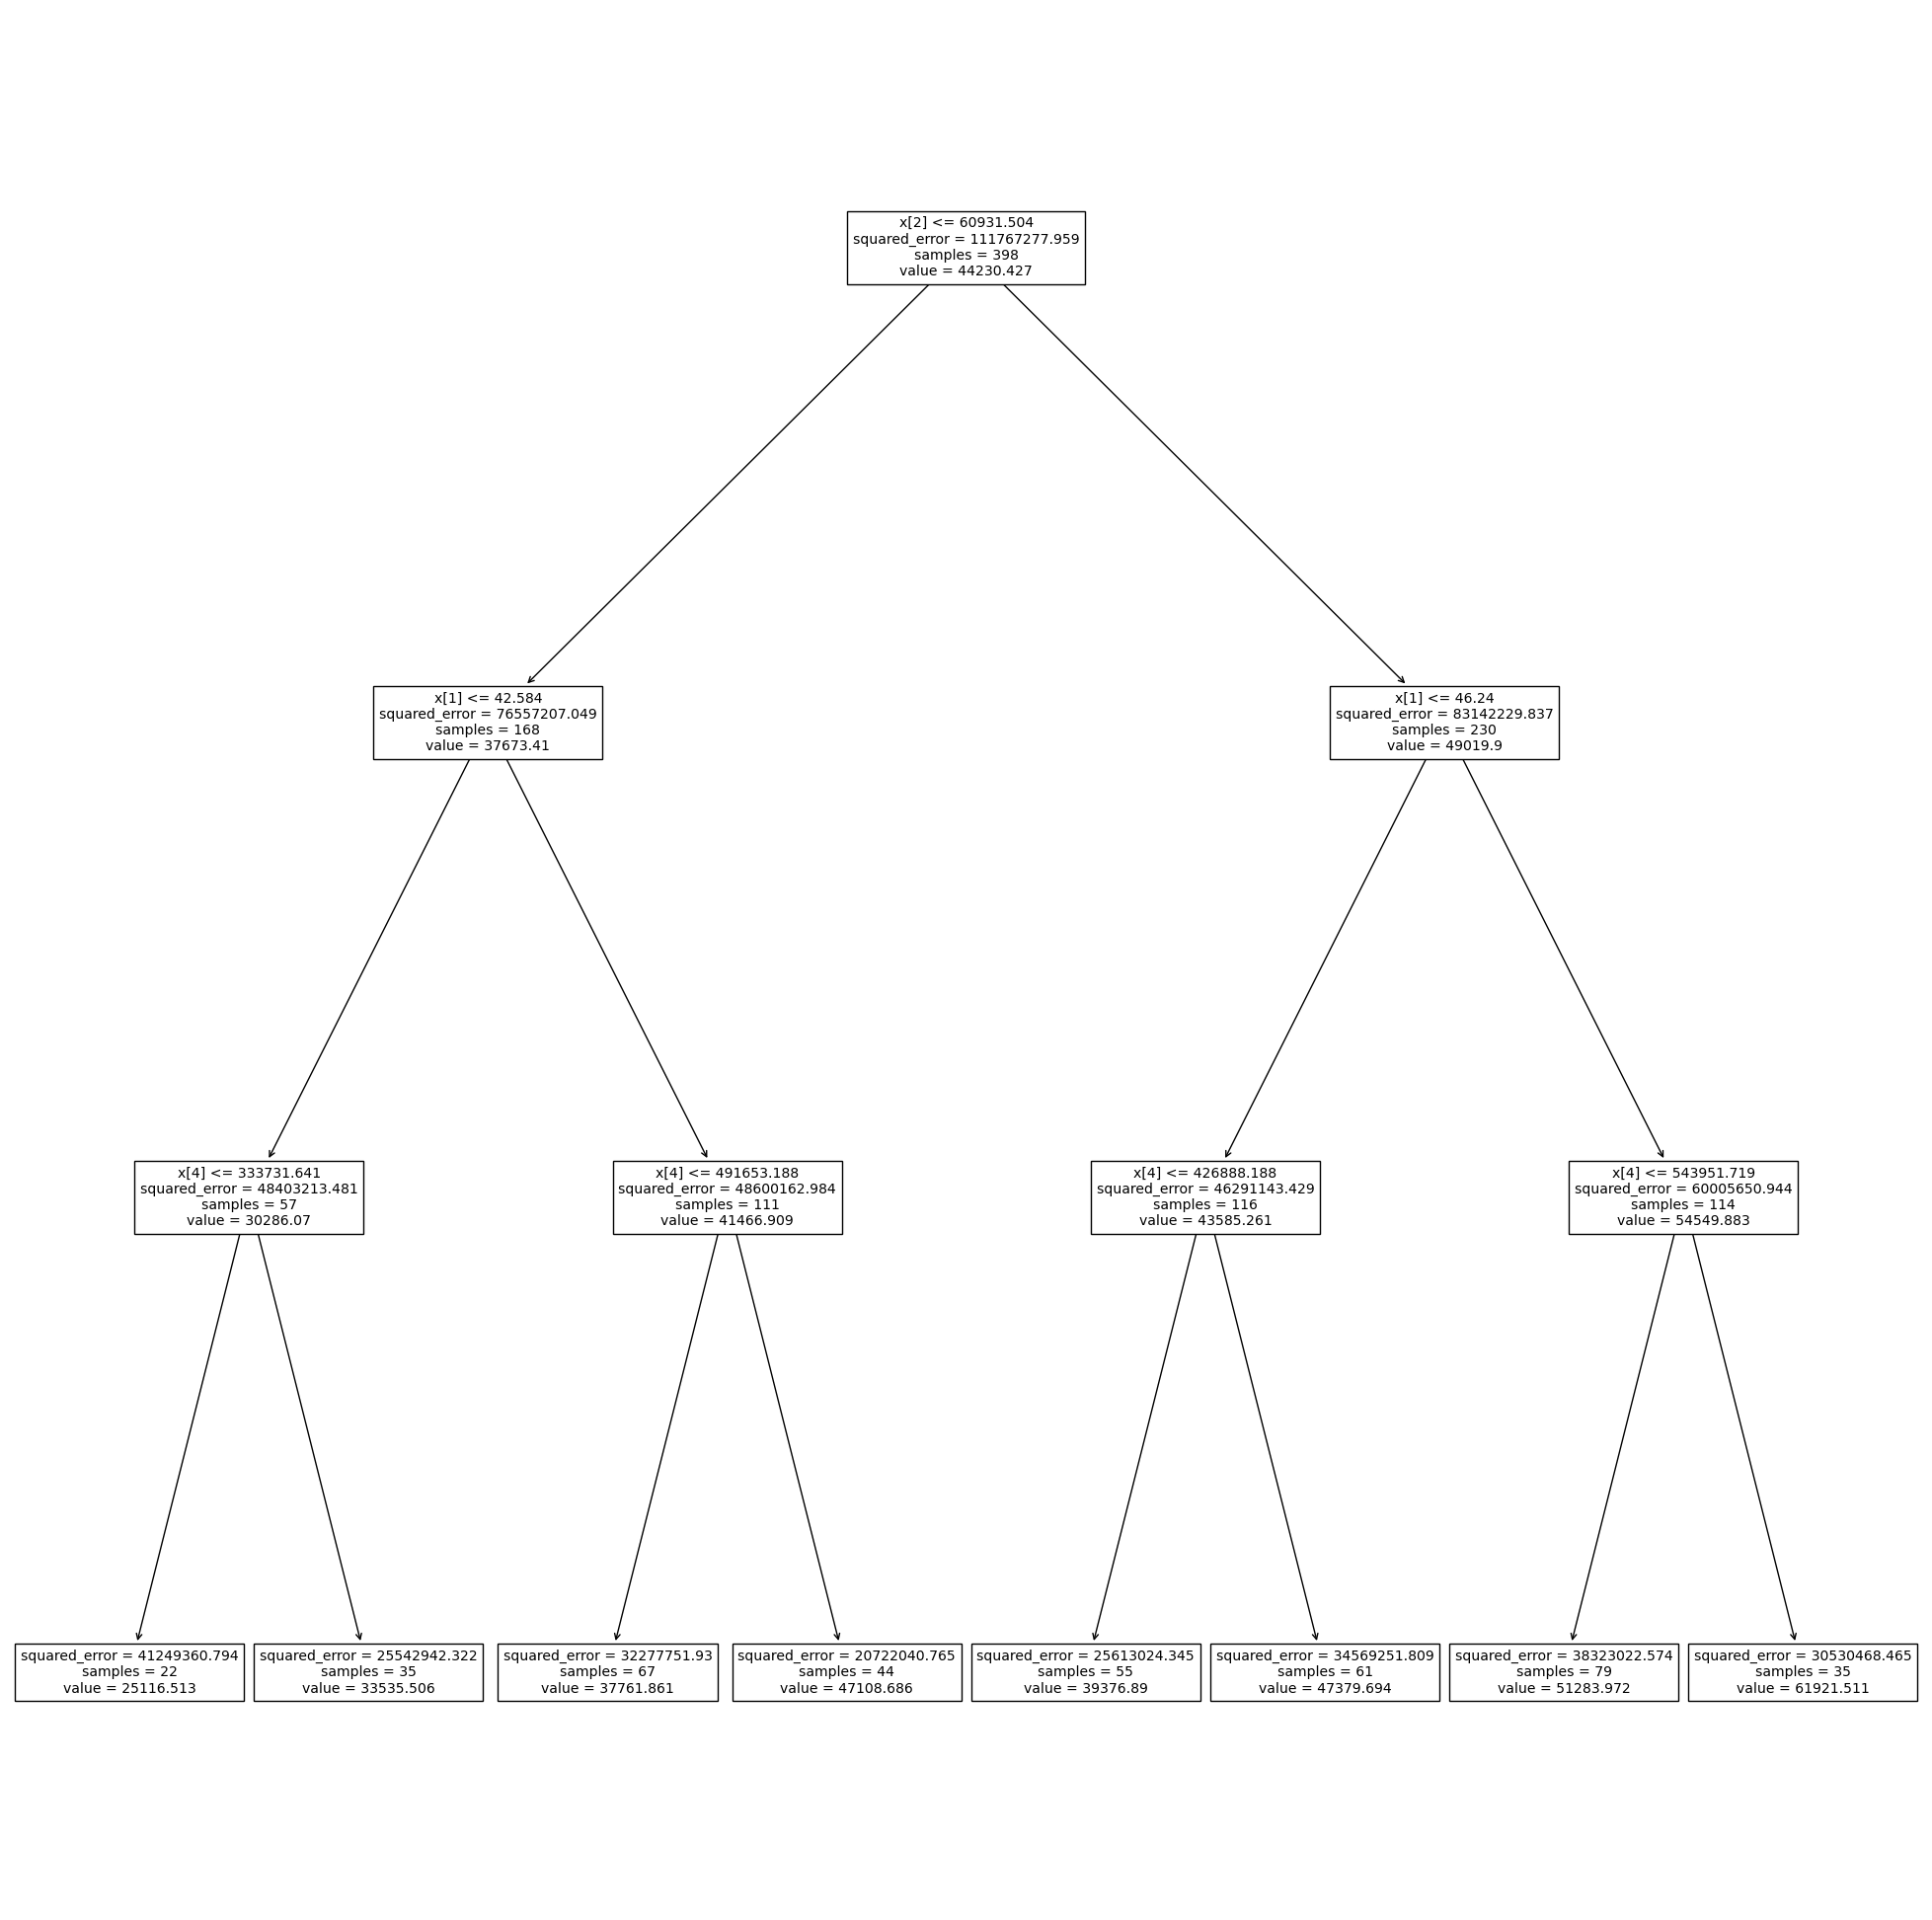

In [108]:
plt.figure(figsize=(25,25))
tree.plot_tree(regressor)

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(n_estimators=100,random_state = 0)
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

In [112]:
from sklearn import metrics
print('RMS Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMS Error: 2588.3885331787683


Text(0, 0.5, 'Predicted')

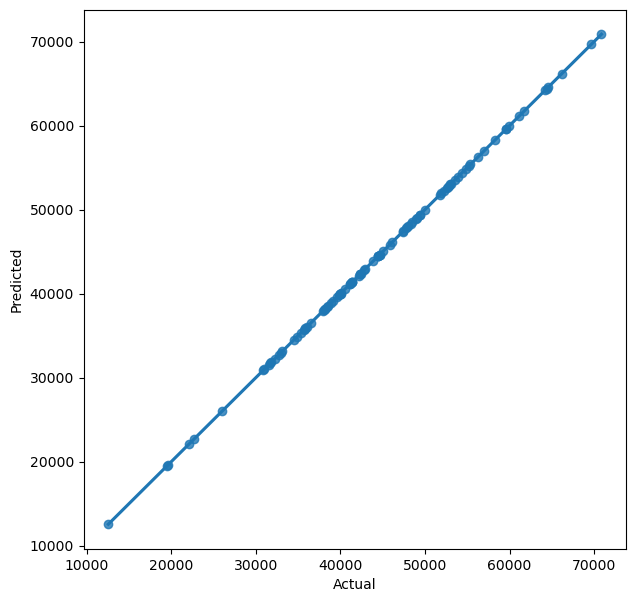

In [113]:
import seaborn as sns
sns.regplot(x=y_test,y=reg_pred,ci=None, data=df)
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [114]:
reg_pred=regressor.predict(X_test)
score=r2_score(reg_pred,y_test)

In [116]:
print("Accuracy:",score)
score_RF = score*100

Accuracy: 0.927600047300542
